<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [5]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [6]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [7]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [8]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [9]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [10]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [11]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [12]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


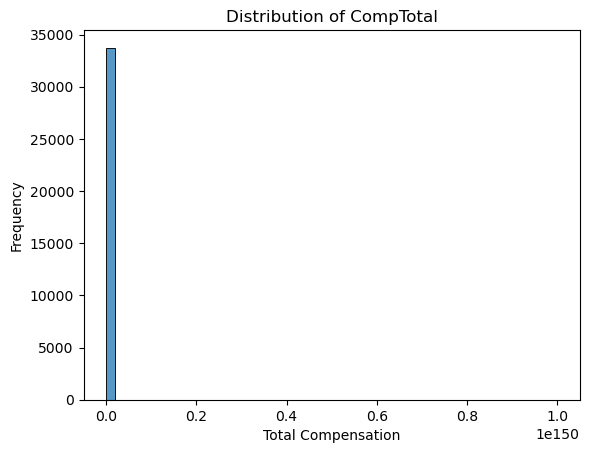

In [13]:
query = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql(query, conn)
sns.histplot(data=df, x='CompTotal', bins=50)
plt.title('Distribution of CompTotal')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.show()

**Box Plots**

Plot a box plot of Age.


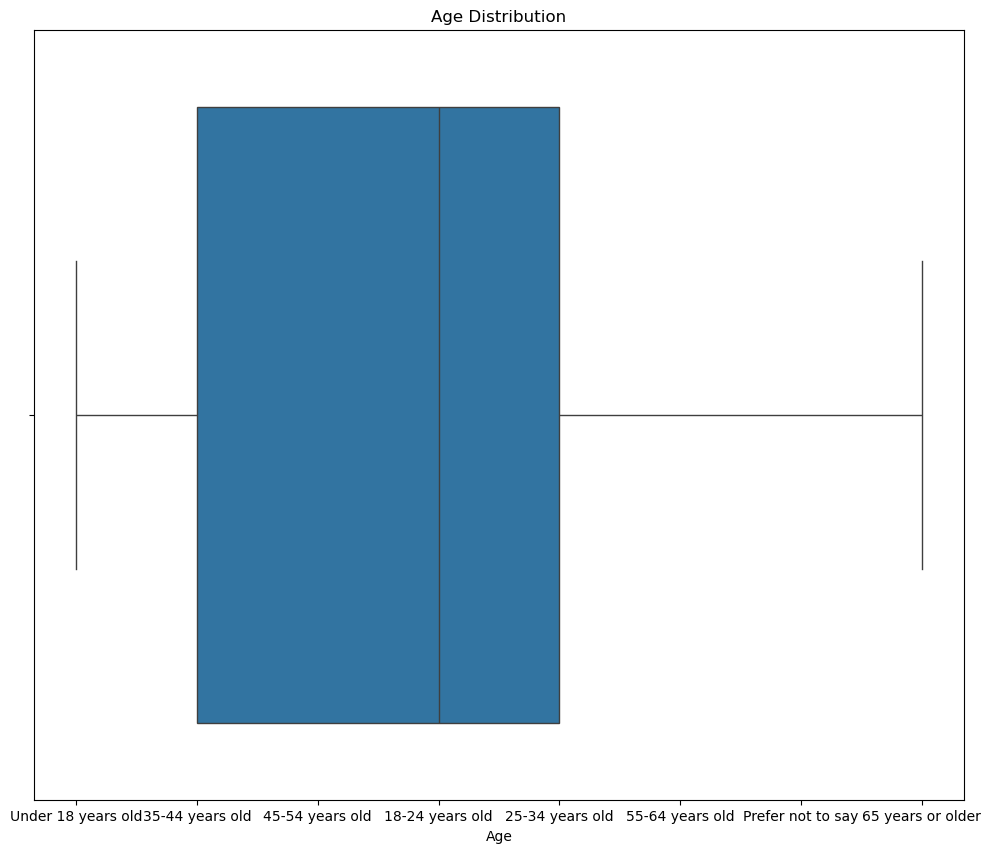

In [14]:
query = """
select Age
from main
"""

df= pd.read_sql(query,conn)

plt.figure(figsize=(12,10))
sns.boxplot(df, x='Age')
plt.title('Age Distribution')
plt.xlabel('Age')

plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


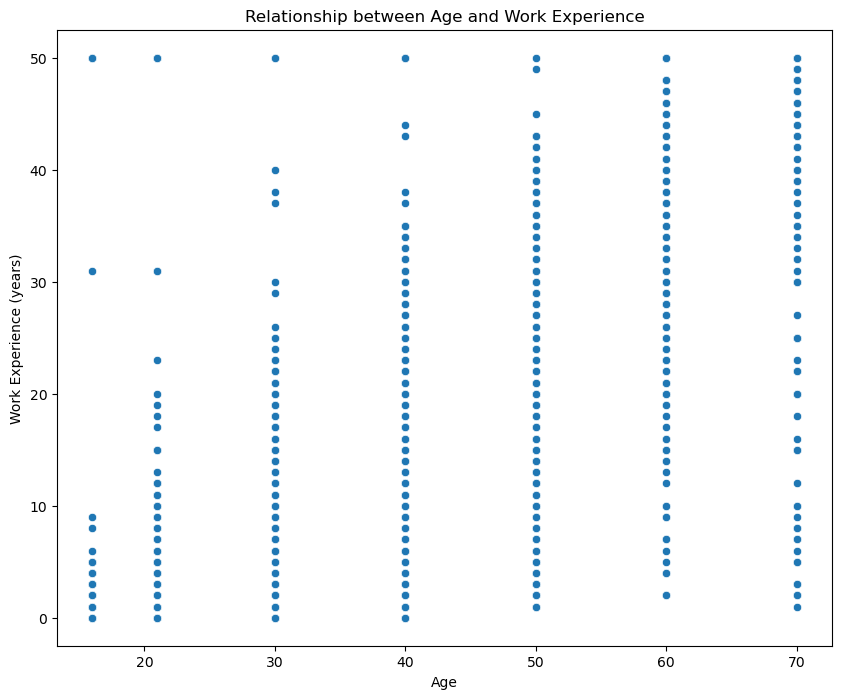

In [15]:
query = """
SELECT Age, WorkExp
FROM main
"""
df = pd.read_sql(query, conn)

def map_age(age):
    if age == 'Under 18 years old':
        return 16
    elif age == '18-24 years old':
        return 21
    elif age == '25-34 years old':
        return 30
    elif age == '35-44 years old':
        return 40
    elif age == '45-54 years old':
        return 50
    elif age == '55-64 years old':
        return 60
    else:
        return 70

df['Age_numeric'] = df['Age'].apply(map_age)

plt.figure(figsize=(10,8))
sns.scatterplot(df, x='Age_numeric', y='WorkExp')
plt.title('Relationship between Age and Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience (years)')

plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [16]:
query = """
select TimeSearching, Frustration, Age
from main
"""
plt.figure(figsize=(10, 6))
df=pd.read_sql(query,conn).dropna()
df['Age_numeric'] = df['Age'].apply(map_age)

print("Sample Frustration values:")
print(df['Frustration'].head(10))
print(f"\nTotal unique frustration combinations: {df['Frustration'].nunique()}")

all_frustrations = set()
for entry in df['Frustration'].dropna():
    frustrations = [f.strip() for f in entry.split(';')]
    all_frustrations.update(frustrations)

print("All frustration categories:")
for frustration in sorted(all_frustrations):
    print(f" - {frustration}")

for frustration in all_frustrations:
    if frustration:
        df[f'fr_{frustration[:30]}'] = df['Frustration'].str.contains(frustration, na=False).astype(int)

df['total_frustrations'] = df[[col for col in df.columns if col.startswith('fr_')]].sum(axis=1)

Sample Frustration values:
10    Amount of technical debt;Number of software to...
12    Amount of technical debt;Complexity of tech st...
15    Amount of technical debt;Complexity of tech st...
18    Amount of technical debt;Tracking my work;Comp...
20    Number of software tools in use;Tracking my wo...
22                             Amount of technical debt
24    Amount of technical debt;Number of software to...
26                                        None of these
31    Amount of technical debt;Number of software to...
33    Amount of technical debt;Tracking my work;Show...
Name: Frustration, dtype: object

Total unique frustration combinations: 953
All frustration categories:
 - Amount of technical debt
 - Complexity of tech stack for build
 - Complexity of tech stack for deployment
 - Maintaining security of code being produced
 - Maintaining security of systems/platforms used in work
 - None of these
 - Number of software tools in use
 - Patching/updating core components
 - Re

<Figure size 1000x600 with 0 Axes>

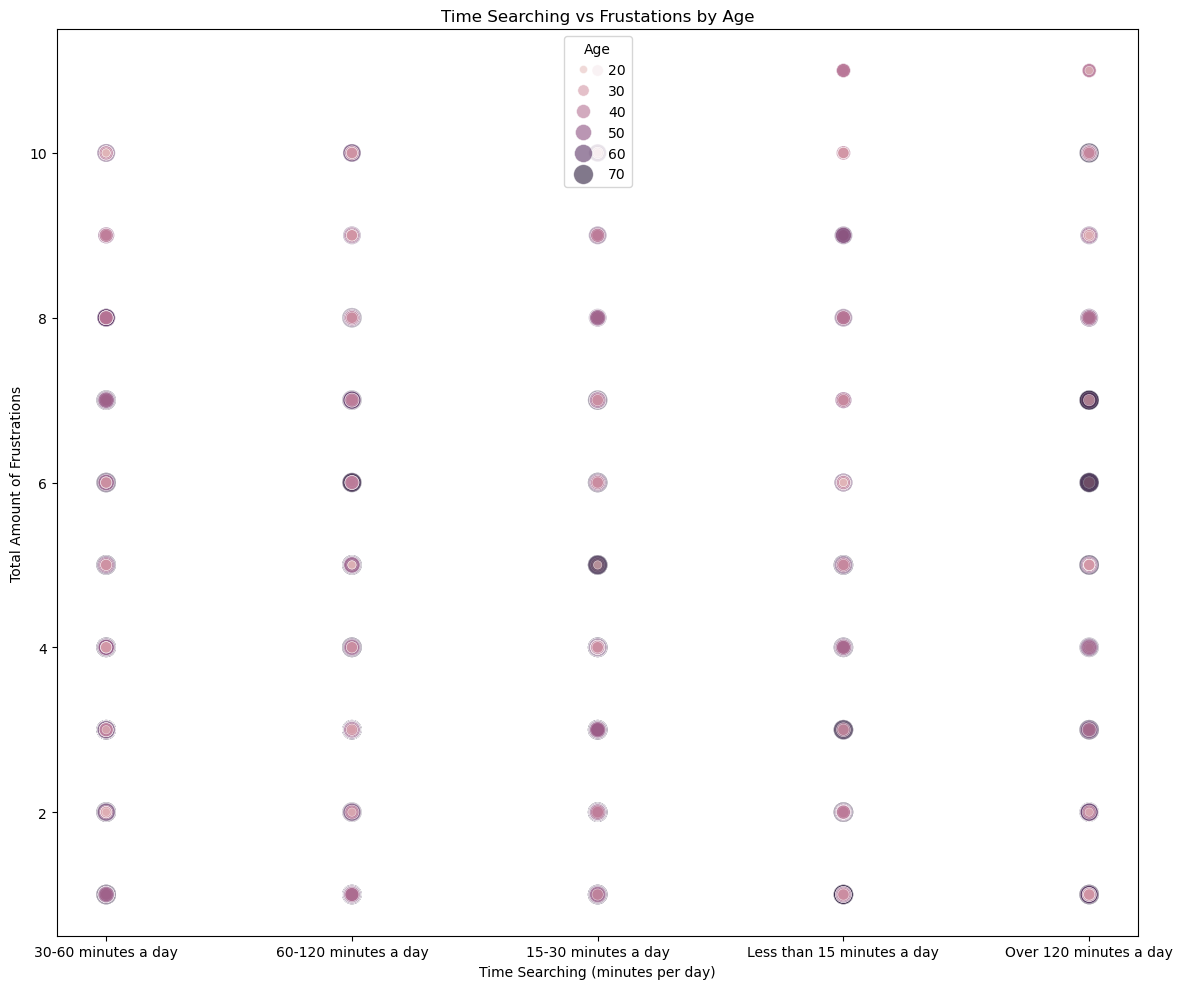

In [17]:
time_mapping = {'Less than 15 minutes a day' : 10,
                '15-30 minutes a day' : 22.5,
                '30-60 minutes a day' : 45,
                '60-120 minutes a day' : 80,
                'Over 120 minutes a day' : 145}


df_clean = df.dropna().copy()
df_clean['TimeSearching_num'] = df_clean['TimeSearching'].map(time_mapping)

plt.figure(figsize=(12,10))

sns.scatterplot(df_clean, x='TimeSearching', y= 'total_frustrations', size = 'Age_numeric', sizes = (20,200), alpha = 0.6, hue = 'Age_numeric')
plt.title('Time Searching vs Frustations by Age')
plt.xlabel('Time Searching (minutes per day)')
plt.ylabel('Total Amount of Frustrations')
plt.legend(title='Age')

plt.tight_layout()
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [18]:
## Write your code here

query="""
select DatabaseWantToWorkWith
from main
"""

df = pd.read_sql(query,conn)

In [19]:
all_databases = set()
for entry in df['DatabaseWantToWorkWith'].dropna():
    databases = [f.strip() for f in entry.split(';')]
    all_databases.update(databases)

for database in all_databases:
    if database:
        df[f'db_{database[:30]}'] = df['DatabaseWantToWorkWith'].str.contains(database, na=False).astype(int)

df['total_databases'] = df[[col for col in df.columns if col.startswith('db_')]].sum(axis=1)

database_cols = [col for col in df.columns if col.startswith('db_')]
totals = df[database_cols].sum(axis=0)

totals_display = pd.DataFrame({
    'Database_Type': [col.replace('db_', '') for col in totals.index],
    'Total_Respondents': totals.values
}).sort_values('Total_Respondents', ascending=False)

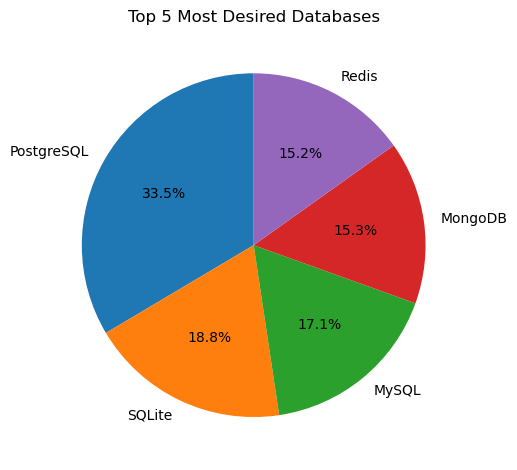

In [20]:
top5 = totals_display.sort_values(by='Total_Respondents', ascending=False).head(5)

top5.plot(
    kind='pie',
    y='Total_Respondents', 
    labels=top5['Database_Type'],
    autopct='%1.1f%%',
    startangle=90,
    legend=False
)
plt.title('Top 5 Most Desired Databases')
plt.ylabel('')
plt.tight_layout()
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [21]:
#NOTE: There are limitations with the data for my analysis as there is no explicit age group of 30-35, however, the closest age group is 25-34, so that will be the one I use


query = """
select TimeSearching, TimeAnswering
from main
where Age = '25-34 years old'
"""

df = pd.read_sql(query, conn)

df_cleaned = df.copy().dropna()
df_cleaned

,TimeSearching,TimeAnswering
1,15-30 minutes a day,30-60 minutes a day
2,Less than 15 minutes a day,15-30 minutes a day
3,60-120 minutes a day,15-30 minutes a day
6,60-120 minutes a day,15-30 minutes a day
8,30-60 minutes a day,15-30 minutes a day
...,...,...
23805,15-30 minutes a day,15-30 minutes a day
23806,60-120 minutes a day,15-30 minutes a day
23836,60-120 minutes a day,30-60 minutes a day
23842,Less than 15 minutes a day,Less than 15 minutes a day


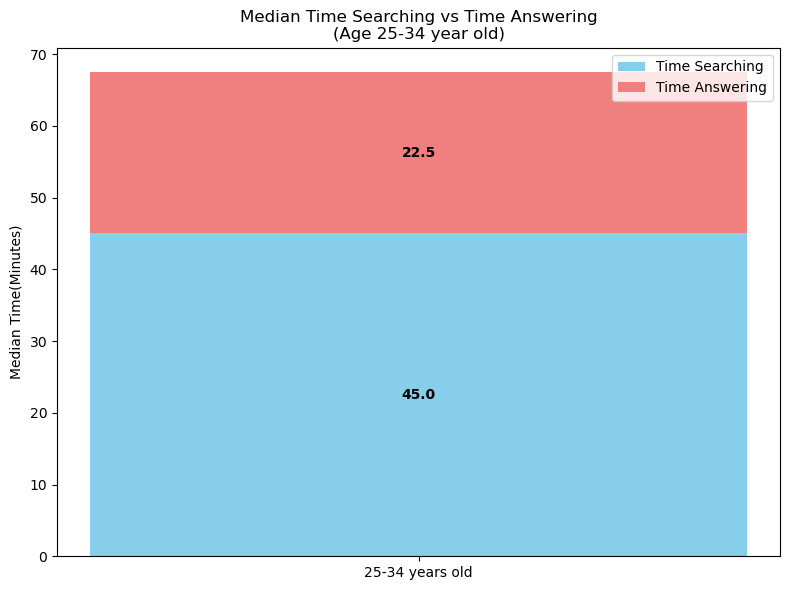

In [22]:
time_mapping = {'Less than 15 minutes a day' : 10,
                '15-30 minutes a day' : 22.5,
                '30-60 minutes a day' : 45,
                '60-120 minutes a day' : 80,
                'Over 120 minutes a day' : 145}

df_cleaned['TimeSearching_num'] = df_cleaned['TimeSearching'].map(time_mapping)
df_cleaned['TimeAnswering_num'] = df_cleaned['TimeAnswering'].map(time_mapping)
ts_med = df_cleaned['TimeSearching_num'].median()
ta_med = df_cleaned['TimeAnswering_num'].median()

data = pd.DataFrame({
    'Activity': ['Searching', 'Answering'],
    'Median_Time': [ts_med, ta_med]
})

plt.figure(figsize=(8,6))
bars = plt.bar(['25-34 years old'], [ts_med], label = 'Time Searching', color='skyblue')
plt.bar(['25-34 years old'], [ta_med], bottom=[ts_med], label = 'Time Answering', color='lightcoral')
plt.title('Median Time Searching vs Time Answering\n(Age 25-34 year old)')
plt.ylabel('Median Time(Minutes)')

plt.legend()
plt.text(0, ts_med/2, f'{ts_med:,.1f}', ha='center', va='center', fontweight = 'bold')
plt.text(0, ts_med + ta_med/2, f'{ta_med:,.1f}', ha='center', va='center', fontweight = 'bold')
plt.tight_layout()


plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


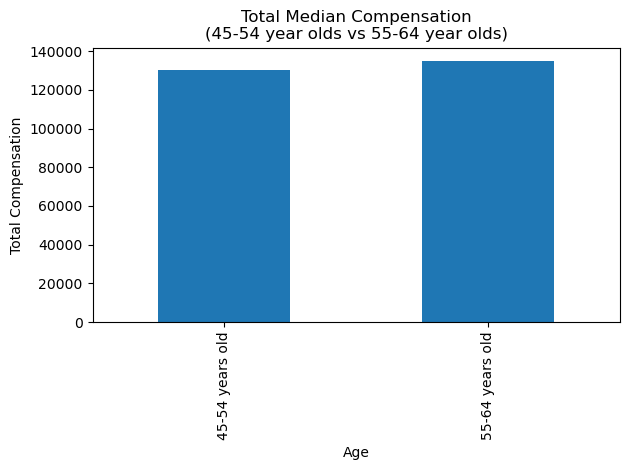

In [23]:
#Similarly to the last exercise, the data is limited making the specific age group of 45-60 impossible to acquire. Thus I will use both 45-54 and 55-64 as my age group
# I decided against using a line chart as it does not show the difference between the two age groups and is not an applicable chart for this data
query = """
select CompTotal, Age
from main
where Age = '45-54 years old' or Age = '55-64 years old'
"""

df = pd.read_sql(query, conn)
df_cleaned = df.copy().dropna()
df_cleaned


medians = df_cleaned.groupby('Age')['CompTotal'].median()
data = pd.DataFrame({
    'Age': medians.index,
    'Median_Comp': medians.values
})
data.plot(kind='bar', x='Age', y='Median_Comp', legend = False)
plt.ylabel('Total Compensation')
plt.title('Total Median Compensation\n(45-54 year olds vs 55-64 year olds)')
plt.tight_layout()
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


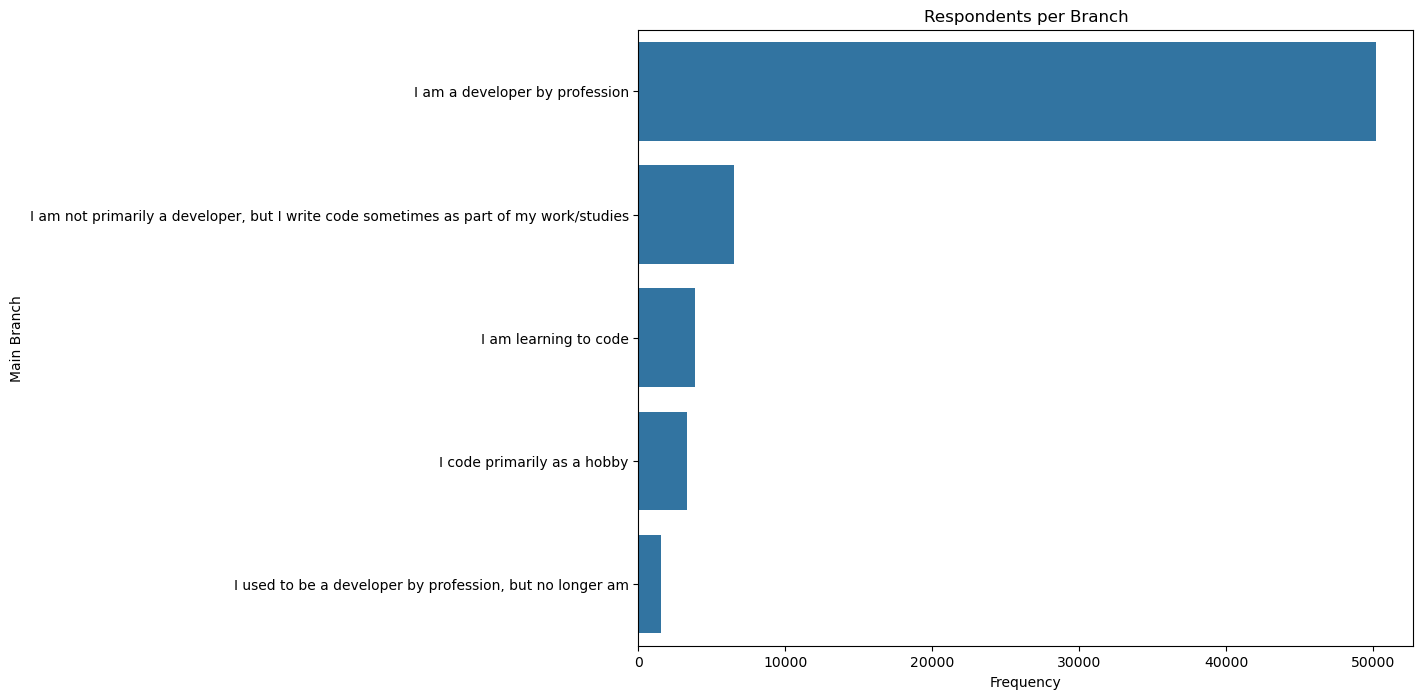

In [24]:
query = """
select MainBranch, count(*) as Frequency
from main
group by MainBranch
order by Frequency DESC
"""
plt.figure(figsize=(10,8))
df = pd.read_sql(query, conn)
sns.barplot(df, y='MainBranch', x='Frequency')
plt.title('Respondents per Branch')
plt.xlabel('Frequency')
plt.ylabel('Main Branch')


plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [25]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
